In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab

# h/a vs. a

In [43]:
text_file1 = np.loadtxt('hoverrNoCommas.txt', dtype = 'float')
print text_file1 # Prints the text file as a 2d array.
print text_file1.shape

[[ 0.4076886  -0.63140897]
 [ 0.54223664 -0.66783315]
 [ 0.64981802 -0.7223981 ]
 [ 0.74841391 -0.78149655]
 [ 0.87389496 -0.85877652]
 [ 1.02620004 -0.98147974]
 [ 1.16955019 -1.09509559]
 [ 1.2949803  -1.195077  ]
 [ 1.38454995 -1.27687009]
 [ 1.48312546 -1.34504911]
 [ 1.55480563 -1.39958689]
 [ 1.65344227 -1.44052419]
 [ 1.73422    -1.44058531]
 [ 1.82400359 -1.42703237]
 [ 1.90483225 -1.40439206]
 [ 1.97661429 -1.41352697]
 [ 2.0573207  -1.4453701 ]
 [ 2.14691073 -1.51808262]
 [ 2.20959522 -1.58169419]
 [ 2.29013863 -1.68618192]
 [ 2.39754682 -1.81793176]
 [ 2.48705534 -1.92696657]
 [ 2.56768025 -1.99513201]
 [ 2.63041568 -2.03604214]
 [ 2.72904213 -2.08151972]
 [ 2.80976383 -2.10655243]
 [ 2.89948119 -2.12251135]
 [ 2.9623185  -2.11801861]
 [ 3.0611538  -2.0704203 ]
 [ 3.18694557 -2.0092215 ]
 [ 3.51940871 -1.84148216]
 [ 4.02259616 -1.58760641]
 [ 4.5527299  -1.32467045]
 [ 5.00200442 -1.09799567]
 [ 5.3883754  -0.9053255 ]
 [ 6.0622617  -0.57666404]
 [ 6.60139112 -0.3046543 ]
 

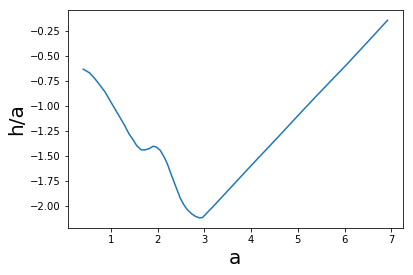

In [44]:
a = text_file1[:,0]
ratio = text_file1[:,1]
plt.plot(a,ratio) # Sets each column as the x and y coordinates, and creates and shows a plot.
plt.xlabel('a',fontsize=20)
plt.ylabel('h/a',fontsize=20)

# h vs. a

In [63]:
a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = ratio1*a1
print height

[  5.97419825e-01   7.48864931e-01   8.46096548e-01   9.26653493e-01
   1.03542452e+00   1.10846071e+00   1.18701061e+00   1.25864514e+00
   1.28138566e+00   1.37428357e+00   1.42961383e+00   1.63274396e+00
   1.96623165e+00   2.49442940e+00   3.16548449e+00   3.65668312e+00
   4.09214110e+00   4.25429997e+00   4.24522814e+00   4.01750759e+00
   3.79852562e+00   3.63152274e+00   3.73721635e+00   3.92982799e+00
   4.44142580e+00   5.04907005e+00   5.98370042e+00   6.98714721e+00
   9.78889119e+00   1.50565013e+01   4.76350412e+01   2.72263709e+02
   1.69067236e+03   8.01694211e+03   3.04123448e+04   3.05912809e+05
   1.98032658e+06   6.01085228e+06]


# h vs a adjusted

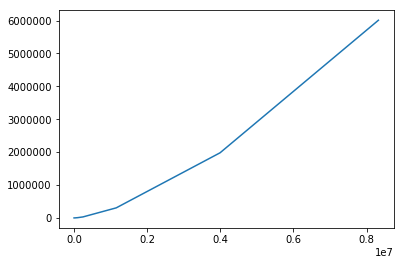

In [65]:
plt.plot(a1,height)

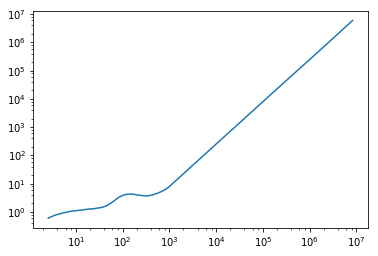

In [68]:
logPlot = plt.gca()
logPlot.loglog(a1,height)

# Surf.density vs a

In [45]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
print text_file2
print text_file2.shape
a2 = text_file2[:,0]
surface_density = text_file2[:,1]

[[ 0.41441441  3.70709382]
 [ 0.57657658  3.84439359]
 [ 0.81981982  4.10526316]
 [ 1.18018018  4.5583524 ]
 [ 1.47747748  4.92906178]
 [ 1.57657658  5.02517162]
 [ 1.65765766  5.06636156]
 [ 1.75675676  5.02517162]
 [ 1.81981982  4.94279176]
 [ 1.88288288  4.90160183]
 [ 1.97297297  4.8604119 ]
 [ 2.07207207  4.91533181]
 [ 2.16216216  5.02517162]
 [ 2.24324324  5.17620137]
 [ 2.32432432  5.35469108]
 [ 2.42342342  5.53318078]
 [ 2.53153153  5.6979405 ]
 [ 2.65765766  5.80778032]
 [ 2.74774775  5.84897025]
 [ 2.86036036  5.83524027]
 [ 2.96396396  5.81464531]
 [ 3.17117117  5.50572082]
 [ 3.55855856  4.94279176]
 [ 4.05405405  4.18764302]
 [ 4.58558559  3.39130435]
 [ 5.09009009  2.62929062]
 [ 5.5045045   2.02517162]
 [ 6.06306306  1.19450801]
 [ 6.5045045   0.50800915]
 [ 6.93693694 -0.13043478]]
(30, 2)


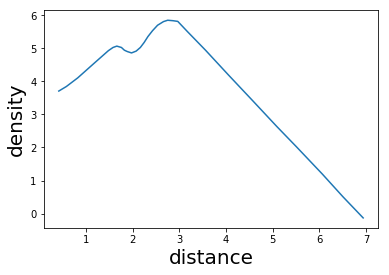

In [46]:
plt.plot(a2,surface_density) 
plt.xlabel('distance',fontsize=20)
plt.ylabel('density',fontsize=20)

In [71]:
def surface_density(s_density_vs_distance):
    surface_density_condlist = [(surface_density >= 3.707) & (surface_density <= 4.943), (surface_density >= 4.902) & (surface_density <=5.355), (surface_density >= 5.533) & (surface_density <=5.835),(surface_density >= 4.943) & (surface_density <=-0.130)]
    surface_density_funclist = [lambda surface_density: 0.8*surface_density - (4.5), lambda surface_density: -(0.5)*surface_density - (4.0), lambda surface_density: 1.5*surface_density -(9.3), lambda surface_density: -(1.5)*surface_density + 10.4]
    
    distance_a = np.piecewise(surface_density, surface_density_condlist, surface_density_funclist)
    
    return distance_a

# This is velocity vs. distance

In [97]:
c = 6.67e-11*2*1.99e30*10**8
d = text_file1[:,0]
distance2= 10**d

distance_in_meters = distance2*(2*c)
speed_of_light_squared=(3e8)**2
distance = (distance_in_meters/speed_of_light_squared)
print distance

distance_in_rg = distance/(1.5*10**11)
velocity = (c/distance)**(1/2.0)*10**(-3)


[  1.50829051e+12   2.05604699e+12   2.63399178e+12   3.30529560e+12
   4.41256741e+12   6.26608716e+12   8.71658928e+12   1.16352761e+13
   1.43003393e+13   1.79441072e+13   2.11642082e+13   2.65606479e+13
   3.19901583e+13   3.93368861e+13   4.73836640e+13   5.58998556e+13
   6.73158132e+13   8.27384004e+13   9.55854111e+13   1.15062822e+14
   1.47347649e+14   1.81072182e+14   2.18010115e+14   2.51890665e+14
   3.16110212e+14   3.80680137e+14   4.68034198e+14   5.40897399e+14
   6.79125742e+14   9.07281305e+14   1.95076566e+15   6.21430489e+15
   2.10632943e+16   5.92653439e+16   1.44268593e+17   6.80860434e+17
   2.35606633e+18   4.91108569e+18]


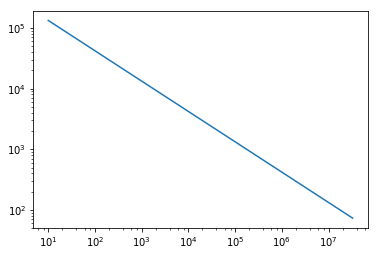

In [98]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,velocity)
